# 04 Cellular Automaton Fire Model

A cellular automaton comprises a finitely sized grid of cells which can each be in one of a finite number of states. If we initialise the grid such that each cell has some state we can iterate the grid to a new state by changing each cell's state based on some rule applied to the cell's current state and the current states of it's neighbouring cells. Repeatedly performing this process gives us a times series of grid states for t=0,1,2,3,...

A popular example of a cellular automaton is the so called "Conway's game of life"

We are going to use a cellular automata and a basic vegetation model to make a primitive model of bushfire behaviour. This model will ignore all factors except for vegetation so it is not going to be very useful, at the end we will offer you to opportunity to add more complexity to the model if you wish.

In our model we will have two grids, the state grid and the model grid.

Each cell in the model grid contains the (integer) amount of iterations each state grid cell will burn for once alight. A value of 0 means that cell is inflammable, 1 means it will burn for one iteration, 2 for two etc...

Each cell in the state model will be in one of the following states:

- (-1) meaning the cell is burnt and cannot re-ignite
- (0) meaning the cell is unburnt and can ignite
- (1) has been burning for one iteration
- (2) has been burning for two iterations
- ($n$) has been burning for $n>0$ iterations

We will use the following rule to iterate the state grid cell-by cell.

- If the cell state is (-1) it stays as (-1)
- If the cell state is (0) and the associated vegetation burn time is not (0) it catches alight (get changed to 1) if the sum of the burning times of the neighbouring eight pixels is at least two iterations.
- If the cell state is ($n>0$) then either the new state is ($n+1$) or (-1) depending on if it has reached or exceeded it's maximum burn time.

First I want to create a very crude vegetation model, I will do this by creating a $100\times 100$ array of randomly picked values between -1 and 6:


max burn time is:  6 iterations and min burn time is:  -1  iterations


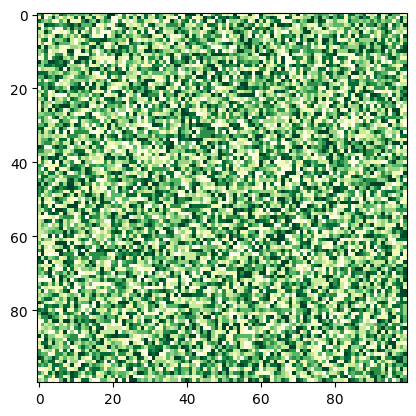

In [1]:
import numpy as np
import matplotlib.pyplot as plt

vegetation_model = np.random.randint(-1,7,(100,100))
plt.imshow(vegetation_model,cmap='YlGn')
print("max burn time is: ",np.max(vegetation_model),"iterations and min burn time is: ",np.min(vegetation_model)," iterations")

Next i will initialise a state array with some cells initially burnt or burning:



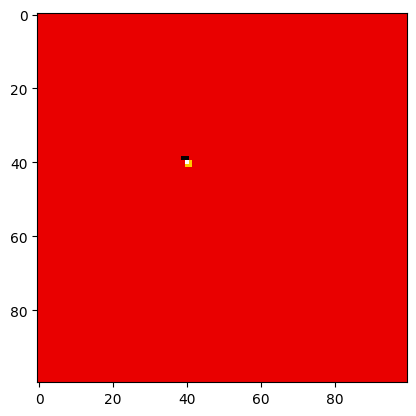

In [2]:
init_state = np.zeros((100,100))
init_state[39,39] = -1
init_state[39,40] = -1
init_state[40,40] = 2
init_state[40,41] = 1
init_state[41,41] = 1
init_state[41,40] = 1
plt.imshow(init_state,cmap='hot')

Next complete the function iterate_fire that takes a state grid current_state and a vegetation model veg_model to return the next state of the grid according to the rule:

In [3]:
def iterate_fire(current_state,veg_model):
  (num_rows,num_cols) = np.shape(current_state)
  next_state = np.zeros((num_rows,num_cols))

  for r in range(num_rows):
    for c in range(num_cols):

      # YOUR CODE HERE!!!!
      next_state[r,c] = 0

  return next_state

Now plot what happens to the fire after one iteration. Hint: Call the function you just wrote and use plt.imshow with cmap="hot".



In [4]:
# Your code here!!!

Now complete the function iterate_fire_t_times. It should take a  $r\times c$ state grid and vegetation model and return a 3D $r\times c\times (n+1)$ array called time_series_array where time_series_array[:,:,t] corresponds to the fire's state at time t. At the end of the function you may choose to set all values in time_series_array that are greater than 1 to 1 so the time series only contains the information:

- (-1) Burnt
- (0) Unburnt
- (1) Burning

In [5]:
def time_series_array(init_state_grid,veg_model,t):
  (num_rows,num_cols) = np.shape(init_state_grid)
  time_series_array = np.zeros((num_rows,num_cols,(t+1)))
  time_series_array[:,:,0] = init_state_grid # Sets time_series_array[:,:,0] to the t=0 state

  # YOUR CODE HERE!!!!

  return time_series_array

The following code will plot your model for the times included in times_list provided the length of that list is even. If you want a challenge you can try animating the time series as a GIF.

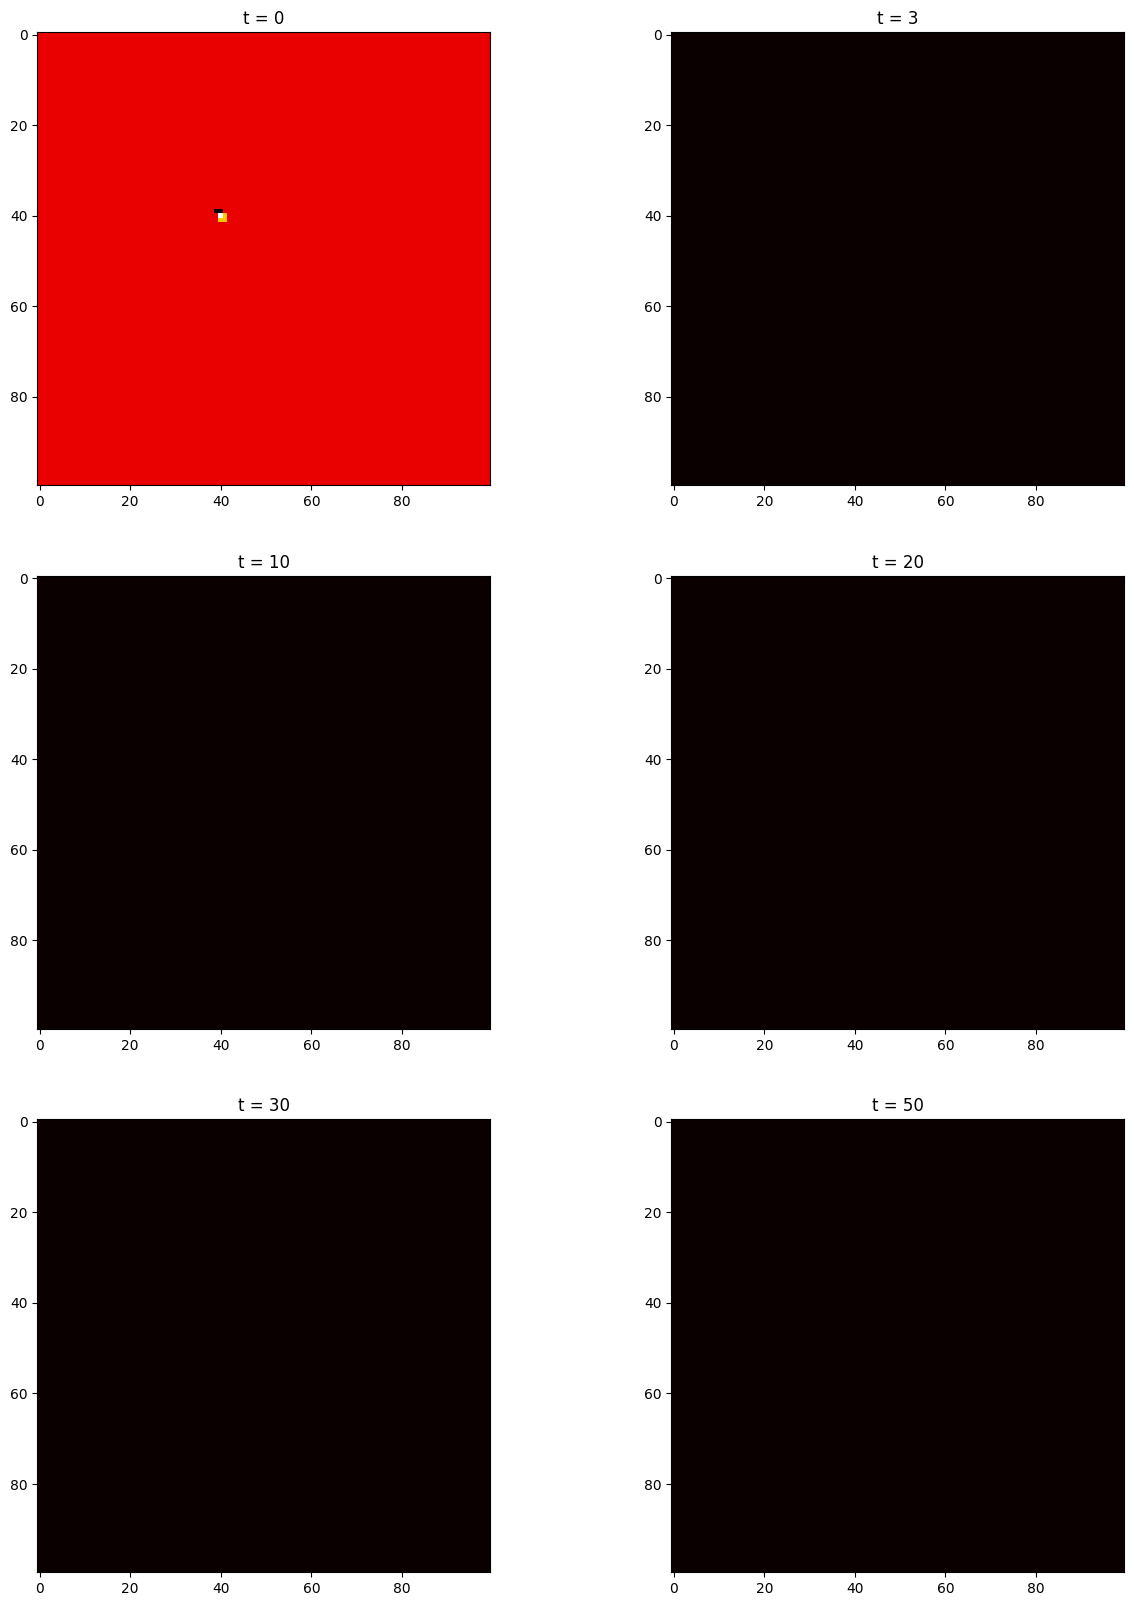

In [6]:
times_list = np.array([0,3,10,20,30,50])

time_series = time_series_array(init_state, vegetation_model, np.max(times_list))

if len(times_list) % 2 == 0:

  fig, ax_list = plt.subplots(nrows= round(len(times_list)/2), ncols=2, layout=None, figsize=(15,20))

  for t in range(len(times_list)):
    ax_list[t//2,t%2].imshow(time_series[:,:,t],cmap='hot')
    ax_list[t//2,t%2].set_title("t = "+str(times_list[t]))

else:
  print("times_list must be even")